### Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder

# For Model Building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package stopwords to C:\Users\Abubakar
[nltk_data]     Iftikhar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Abubakar
[nltk_data]     Iftikhar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Loading dataset

In [3]:
data = pd.read_csv("./dataset/emails.csv",encoding='latin1')
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2197,ham,Bring it if you got it,NaN,NaN,NaN
2291,ham,Remind me how to get there and I shall do so,NaN,NaN,NaN
5447,ham,So that takes away some money worries,NaN,NaN,NaN
119,spam,PRIVATE! Your 2004 Account Statement for 07742...,NaN,NaN,NaN
1469,ham,7 wonders in My WORLD 7th You 6th Ur style 5th...,NaN,NaN,NaN


### Initial exploration & cleaning

- Shape of the data

In [4]:
row, col = data.shape
print(f"There are {row} Number of rows and {col} columns in the dataframe")

There are 5572 Number of rows and 5 columns in the dataframe


- drop the unwanted columns

In [5]:
data.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [6]:
data.sample(5)

,v1,v2
1438,ham,"Arms fine, how's Cardiff and uni?"
1813,ham,Yes we are chatting too.
5073,ham,I want to sent &lt;#&gt; mesages today. Thats...
3269,ham,K actually can you guys meet me at the sunoco ...
3482,ham,"Hello, my love! How goes that day ? I wish you..."


- Rename columns name

In [7]:
# data.rename(columns={"v1":"label", "v2":"email"}, inplace=True)
data.rename(columns={"v1":"result", "v2":"emails"}, inplace=True)

In [8]:
data.sample(5)

,result,emails
2018,ham,Ya it came a while ago
1275,ham,Wot u up 2 u weirdo?
3607,ham,Pls come quick cant bare this.
4246,spam,Text PASS to 69669 to collect your polyphonic ...
2072,ham,That is wondarfull song


- Checking for null values

In [9]:
data.isnull().sum()

result    0
emails    0
dtype: int64

- Checking for duplicated rows

In [10]:
data.duplicated().sum()

np.int64(403)

In [11]:
data.drop_duplicates(keep="first", inplace=True)

In [12]:
data.duplicated().sum()

np.int64(0)

In [13]:
row, col = data.shape
print(f"There are {row} Number of rows and {col} columns in the dataframe")

There are 5169 Number of rows and 2 columns in the dataframe


### EDA

**1- Distribution of Labels**

In [14]:
data['result'].value_counts()

result
ham     4516
spam     653
Name: count, dtype: int64

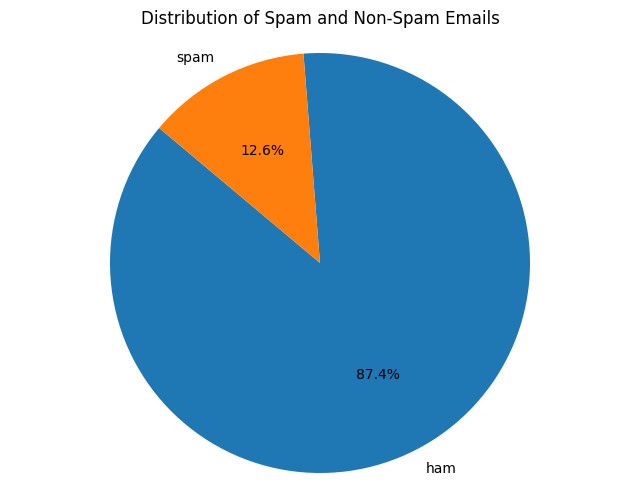

In [15]:
plt.figure(figsize=(8, 6))
plt.pie(data['result'].value_counts(), labels=data['result'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.axis('equal') 
plt.show()

**2- Average Length of Emails for Spam and Ham**

In [16]:
data['Length'] = data['emails'].apply(len)


In [17]:
# nltk.data.lo
data['num_words'] = data['emails'].apply(word_tokenize).apply(len)


In [18]:
data['num_sentence'] = data['emails'].apply(sent_tokenize).apply(len)


In [19]:
data.head()

,result,emails,Length,num_words,num_sentence
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
avg_length_spam = data[data['result'] == 'spam']['Length'].mean()


In [21]:
avg_length_ham = data[data['result'] == 'ham']['Length'].mean()

In [22]:
avg_length_ham

np.float64(70.45925597874225)

In [23]:
print("Average Length of Spam Emails:", avg_length_spam)
print("Average Length of Ham Emails:", avg_length_ham)

Average Length of Spam Emails: 137.89127105666157
Average Length of Ham Emails: 70.45925597874225


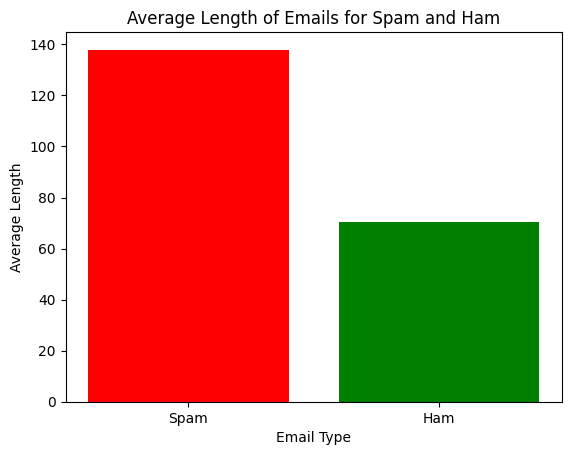

In [24]:
plt.bar(['Spam', 'Ham'], [avg_length_spam, avg_length_ham], color=['Red', 'green'])
plt.title('Average Length of Emails for Spam and Ham')
plt.xlabel('Email Type')
plt.ylabel('Average Length')
plt.show()

**3- Average Word of Emails for Spam and Ham**

In [25]:
avg_word_spam = data[data['result'] == 'spam']['num_words'].mean()
avg_word_ham = data[data['result'] == 'ham']['num_words'].mean()


In [26]:
print("Average Words of Spam Emails:", avg_word_spam)
print("Average Words of Ham Emails:", avg_word_ham)

Average Words of Spam Emails: 27.6676875957121
Average Words of Ham Emails: 17.12378210806023


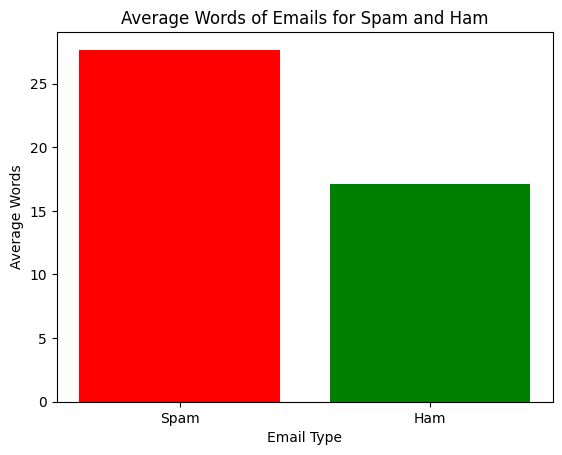

In [27]:
plt.bar(['Spam', 'Ham'], [avg_word_spam, avg_word_ham], color=['Red', 'Green'])
plt.title('Average Words of Emails for Spam and Ham')
plt.xlabel('Email Type')
plt.ylabel('Average Words')
plt.show()

**4- Average Sentence of Emails for Spam and Ham**

In [28]:
avg_sentence_spam = data[data['result'] == 'spam']['num_sentence'].mean()
avg_sentence_ham = data[data['result'] == 'ham']['num_sentence'].mean()


In [29]:
print("Average Sentence of Spam Emails:", avg_sentence_spam)
print("Average Sentence of Ham Emails:", avg_sentence_ham)

Average Sentence of Spam Emails: 2.970903522205207
Average Sentence of Ham Emails: 1.8201948627103632


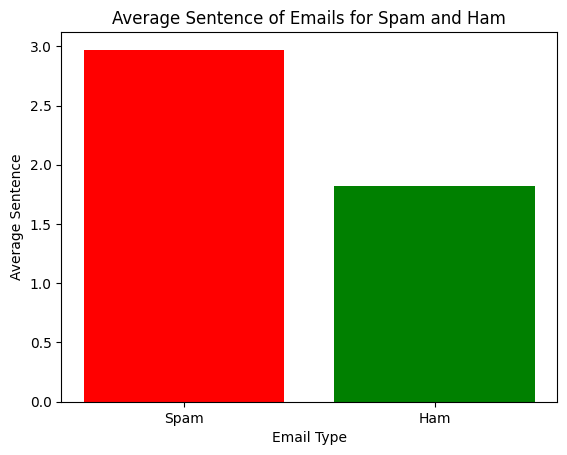

In [30]:
plt.bar(['Spam', 'Ham'], [avg_sentence_spam, avg_sentence_ham], color=['Red', 'Green'])
plt.title('Average Sentence of Emails for Spam and Ham')
plt.xlabel('Email Type')
plt.ylabel('Average Sentence')
plt.show()

**5- Relationship between Length and Spam**

In [31]:
correlation = data['Length'].corr((data['result'] == 'spam').astype(int))
print("Correlation coefficient between email length and spam classification:", correlation)

Correlation coefficient between email length and spam classification: 0.38471706671430717


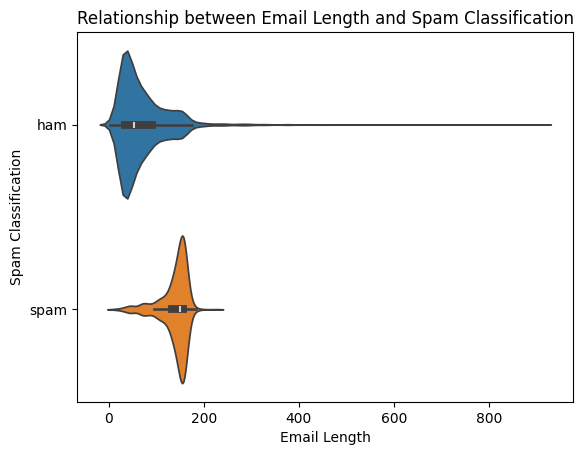

In [32]:
sns.violinplot(data=data, x='Length', y='result', hue='result')
plt.xlabel('Email Length')
plt.ylabel('Spam Classification')
plt.title('Relationship between Email Length and Spam Classification')
plt.show()

**6- Relationship between Features**

In [33]:
correlation_matrix = data[['Length', 'num_words', 'num_sentence']].corr()
print("The Relationship between Features are ",correlation_matrix )

The Relationship between Features are                  Length  num_words  num_sentence
Length        1.000000   0.965760      0.624139
num_words     0.965760   1.000000      0.679971
num_sentence  0.624139   0.679971      1.000000


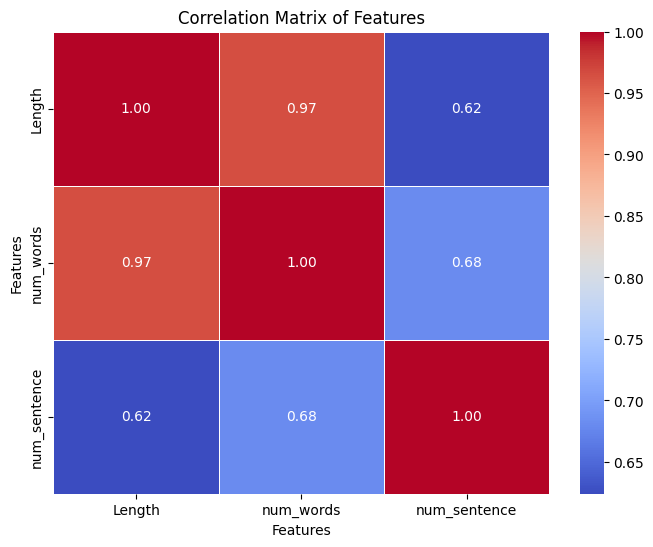

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

### Data Preprocessing

In [35]:
data['transform_text'] = data['emails'].str.lower()

In [36]:
data.head(2)

,result,emails,Length,num_words,num_sentence,transform_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,"go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar... joking wif u oni...


In [37]:
data['transform_text'] = data['transform_text'].apply(word_tokenize)

In [38]:
data.head(2)

,result,emails,Length,num_words,num_sentence,transform_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, until, jurong, point, ,, crazy, .., avail..."
1,ham,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, ..., joking, wif, u, oni, ...]"


In [39]:
data['transform_text'] = data['transform_text'].apply(lambda x: [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in x])

In [40]:
data.head(2)

,result,emails,Length,num_words,num_sentence,transform_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, until, jurong, point, , crazy, , availabl..."
1,ham,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, , joking, wif, u, oni, ]"


In [41]:
stop_words = set(stopwords.words('english'))
data['transform_text'] = data['transform_text'].apply(lambda x: [word for word in x if word not in stop_words and word not in string.punctuation])

In [42]:
data.head(2)

,result,emails,Length,num_words,num_sentence,transform_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joking, wif, u, oni]"


In [43]:
ps = PorterStemmer()
data['transform_text'] = data['transform_text'].apply(lambda x: [ps.stem(word) for word in x])

In [44]:
data.head(2)

,result,emails,Length,num_words,num_sentence,transform_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"


In [45]:
data['transform_text'] = data['transform_text'].apply(lambda x: ' '.join(x))

In [46]:
data.head(2)

,result,emails,Length,num_words,num_sentence,transform_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [47]:
data[['emails', 'transform_text']].head()

,emails,transform_text
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",nah nt think goe usf live around though


**7- Most Common Words in Spam Emails**

In [48]:
spam_emails = data[data['result'] == 'spam']['transform_text']

In [49]:
spam_words = ' '.join(spam_emails).split()

In [50]:
word_counts = Counter(spam_words)


In [51]:
word_counts

Counter({'call': 321,
         'free': 191,
         '2': 157,
         'txt': 141,
         'u': 135,
         'text': 122,
         'ur': 119,
         'mobil': 114,
         'stop': 106,
         'repli': 103,
         '4': 100,
         'claim': 98,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 58,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 46,
         'collect': 45,
         'min': 45,
         'messag': 43,
         'custom': 42,
         'guarante': 42,
         'per': 41,
         '1000': 39,
         '18': 38,
         'chat': 38,
         '16': 37,
         'tri': 37,
         'msg': 36,
         '500': 36,
         'draw': 35,
         'number': 35,
         'cs': 35,
         '1': 33,
         'show': 33,
         '2000': 33,
      

In [52]:
most_common_words = word_counts.most_common(10)

In [53]:
for word, count in most_common_words:
    print(f"{word}: {count} occurrences")

call: 321 occurrences
free: 191 occurrences
2: 157 occurrences
txt: 141 occurrences
u: 135 occurrences
text: 122 occurrences
ur: 119 occurrences
mobil: 114 occurrences
stop: 106 occurrences
repli: 103 occurrences


In [54]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words))

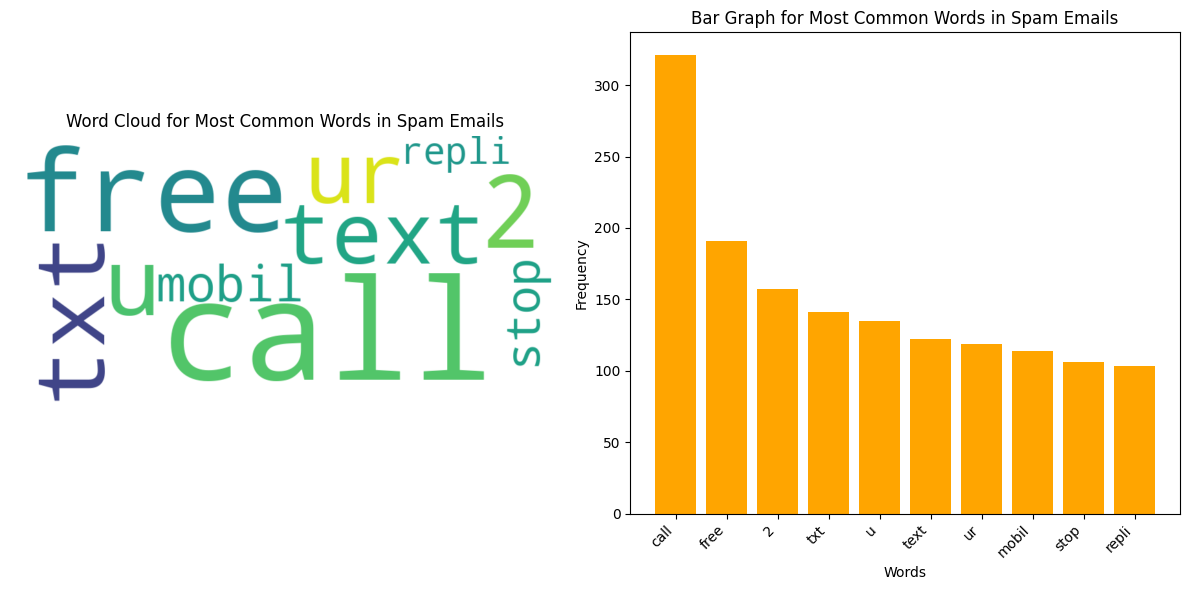

In [55]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Most Common Words in Spam Emails')
plt.axis('off')
# Plot Bar Graph
plt.subplot(1, 2, 2)
words, counts = zip(*most_common_words)
plt.bar(words, counts, color='orange')
plt.title('Bar Graph for Most Common Words in Spam Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [56]:

ham_emails = data[data['result'] == 'ham']['transform_text']


In [57]:
ham_words = ' '.join(ham_emails).split()


In [58]:
word_counts = Counter(ham_words)


In [59]:
most_common_words = word_counts.most_common(10)


In [60]:
print("Top 10 Most Common Words in ham Emails:")
for word, count in most_common_words:
    print(f"{word}: {count} occurrences")


Top 10 Most Common Words in ham Emails:
u: 904 occurrences
go: 404 occurrences
nt: 352 occurrences
get: 352 occurrences
2: 290 occurrences
gt: 288 occurrences
lt: 287 occurrences
come: 275 occurrences
ok: 251 occurrences
got: 238 occurrences


In [61]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words))


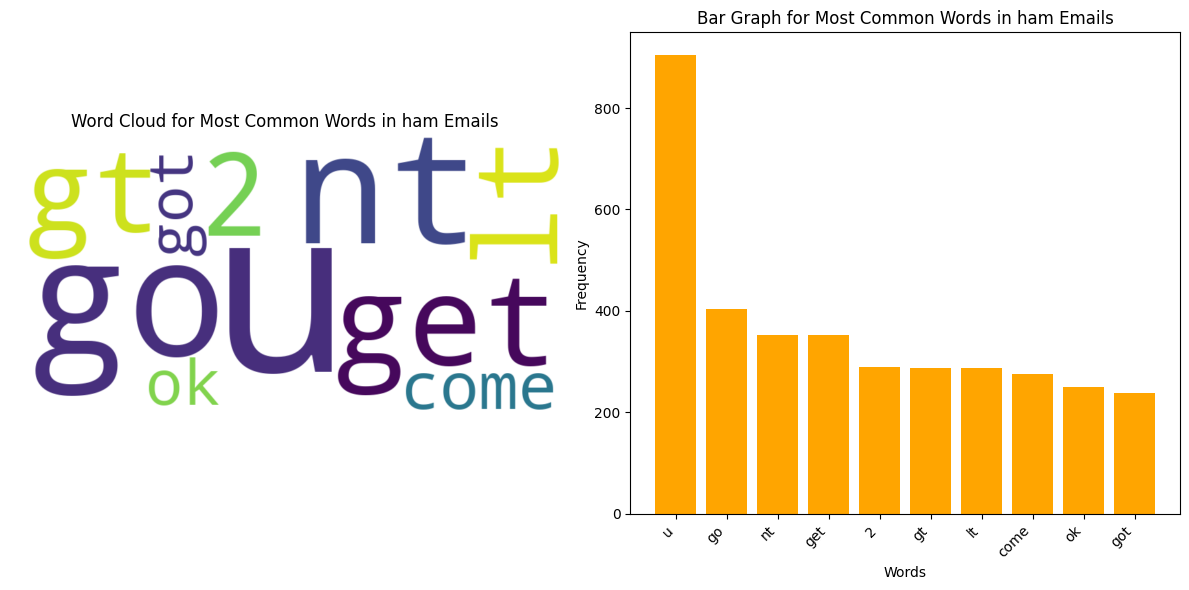

In [62]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Most Common Words in ham Emails')
plt.axis('off')
# Plot Bar Graph
plt.subplot(1, 2, 2)
words, counts = zip(*most_common_words)
plt.bar(words, counts, color='orange')
plt.title('Bar Graph for Most Common Words in ham Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### STEP 5- Preparing Data for Machine Learning: Label Encoding and Vectorization



In [63]:
encoder = LabelEncoder()
data['result'] = encoder.fit_transform(data['result'])


In [64]:
data.sample(2)

,result,emails,Length,num_words,num_sentence,transform_text
1200,0,Otherwise had part time job na-tuition..,40,7,1,otherwis part time job natuit
766,0,"I'm nt goin, got somethin on, unless they meet...",103,26,1,nt goin got somethin unless meetin 4 dinner lo...


In [65]:
tfidf = TfidfVectorizer(max_features=3000)


In [66]:
X = tfidf.fit_transform(data['emails']).toarray()
y = data['result']


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### STEP 6- Model Building

**Model 1- SVC**

In [68]:
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVM Accuracy: {accuracy_svc:.2f}")
print("confusion Matrix :",confusion_matrix(y_test,y_pred_svc))
print("Precision Score: ",precision_score(y_test,y_pred_svc))

SVM Accuracy: 0.99
confusion Matrix : [[889   0]
 [ 14 131]]
Precision Score:  1.0


**Model 2- Random Forest classifier**

In [69]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("confusion Matrix :",confusion_matrix(y_test,y_pred_rf))
print("Precision Score: ",precision_score(y_test,y_pred_rf))

Random Forest Accuracy: 0.98
confusion Matrix : [[888   1]
 [ 21 124]]
Precision Score:  0.992


**Model 3- Naive Bayes classifier**

In [70]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")
print("confusion Matrix :",confusion_matrix(y_test,y_pred_nb))
print("Precision Score: ",precision_score(y_test,y_pred_nb))

Naive Bayes Accuracy: 0.98
confusion Matrix : [[889   0]
 [ 24 121]]
Precision Score:  1.0


**Choosing the Best Classifier for Email Spam Detection**

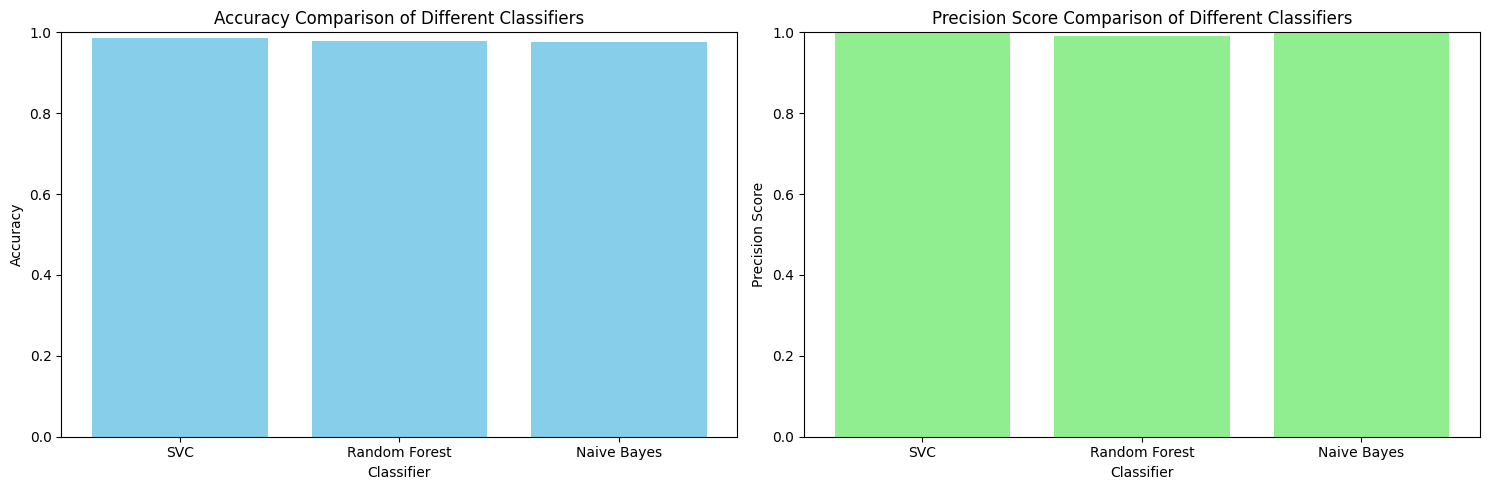

In [71]:
# Calculate precision scores for each classifier
precision_svc = precision_score(y_test, y_pred_svc)
precision_rf = precision_score(y_test, y_pred_rf)
precision_nb = precision_score(y_test, y_pred_nb)

# Create lists to store accuracies and precision scores
classifiers = ['SVC', 'Random Forest', 'Naive Bayes']
accuracies = [accuracy_svc, accuracy_rf, accuracy_nb]
precision_scores = [precision_svc, precision_rf, precision_nb]

# Plot bar graph for accuracies and precision scores side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot bar graph for accuracies
axes[0].bar(classifiers, accuracies, color='skyblue')
axes[0].set_xlabel('Classifier')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy Comparison of Different Classifiers')
axes[0].set_ylim(0, 1)

# Plot bar graph for precision scores
axes[1].bar(classifiers, precision_scores, color='lightgreen')
axes[1].set_xlabel('Classifier')
axes[1].set_ylabel('Precision Score')
axes[1].set_title('Precision Score Comparison of Different Classifiers')
axes[1].set_ylim(0, 1)
plt.tight_layout()
plt.show()

**STEP 6- Model Prediction**

- Type 1- Predict with new data

In [72]:
new_emails = [
    "Get a free iPhone now!",
    "Hey, how's it going?",
    "Congratulations! You've won a prize!",
    "Reminder: Meeting at 2 PM tomorrow."
]

# Convert new data into numerical vectors using the trained tfidf_vectorizer
new_X = tfidf.transform(new_emails)
new_X_dense = new_X.toarray()

# Use the trained SVM model to make predictions
svm_predictions = svc_classifier.predict(new_X_dense)

# Print the predictions
for email, prediction in zip(new_emails, svm_predictions):
    if prediction == 1:
        print(f"'{email}' is predicted as spam.")
    else:
        print(f"'{email}' is predicted as ham.")

'Get a free iPhone now!' is predicted as spam.
'Hey, how's it going?' is predicted as ham.
'Congratulations! You've won a prize!' is predicted as spam.
'Reminder: Meeting at 2 PM tomorrow.' is predicted as ham.


- Type 2- User Input Data Prediction

In [73]:
def predict_email(email):
    # Convert email into numerical vector using the trained TF-IDF vectorizer
    email_vector = tfidf.transform([email])
    
    # Convert sparse matrix to dense array
    email_vector_dense = email_vector.toarray()
    
    # Use the trained SVM model to make predictions
    prediction = svc_classifier.predict(email_vector_dense)
    
    # Print the prediction
    if prediction[0] == 1:
        print("The email is predicted as spam.")
    else:
        print("The email is predicted as ham.")

# Get user input for email
user_email = input("Enter the email text: ")

# Predict whether the input email is spam or ham
print(user_email)
predict_email(user_email)

Wanna win a free iphone?
The email is predicted as spam.
